## **2주차 과제**

# **1. 가설 세우기**
- 혈당 수치가 높을수록 당뇨 환자 비율이 높을 것이다.
- 체질량지수(BMI)가 높을수록 당뇨 환자 비율이 높을 것이다.
- 따라서 혈당, BMI, 연령(Age) 등이 당뇨 발생에 가장 큰 영향을 줄 것이다.

# **2. 라이브러리 불러오기**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split # train - test split
%config InlineBackend.figure_format = 'retina' 

# 3. 데이터 불러오기

### diabetes 데이터 소개
- Pregnancies: 임신 횟수
- Glucose: 혈당 수치
- BloodPressure: 혈압
- SkinThickness: 피하지방 두께
- Insulin: 인슐린 수치
- BMI: 체질량지수
- DiabetesPedigreeFunction:	당뇨병 유전 함수
- Age: 나이
- Outcome: 당뇨병 여부(0: 비당뇨 환자, 1: 당뇨 환자)

In [2]:
%pwd # 현재 위치

'c:\\Users\\withk\\BAF-17-Fresh-Edu\\2주차'

In [3]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# **4. EDA**




### **4-1 데이터 살펴보기**

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
df.info() # 결측치, 변수 타입, 데이터 차원 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe() # 기초통계량

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


-> glucose, bloodpressure, skinthickness, insulin 등 변수의 값이 0인 것은 이상치로 볼 수 있음.

### **4-2 결측치 및 중복 데이터 확인**

In [8]:
df.isna().sum(axis=0).sort_values() #결측치 개수 오름차순 정렬

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df[df.duplicated()] #중복행 확인

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


Text(0.5, 1.0, 'correlation heatmap')

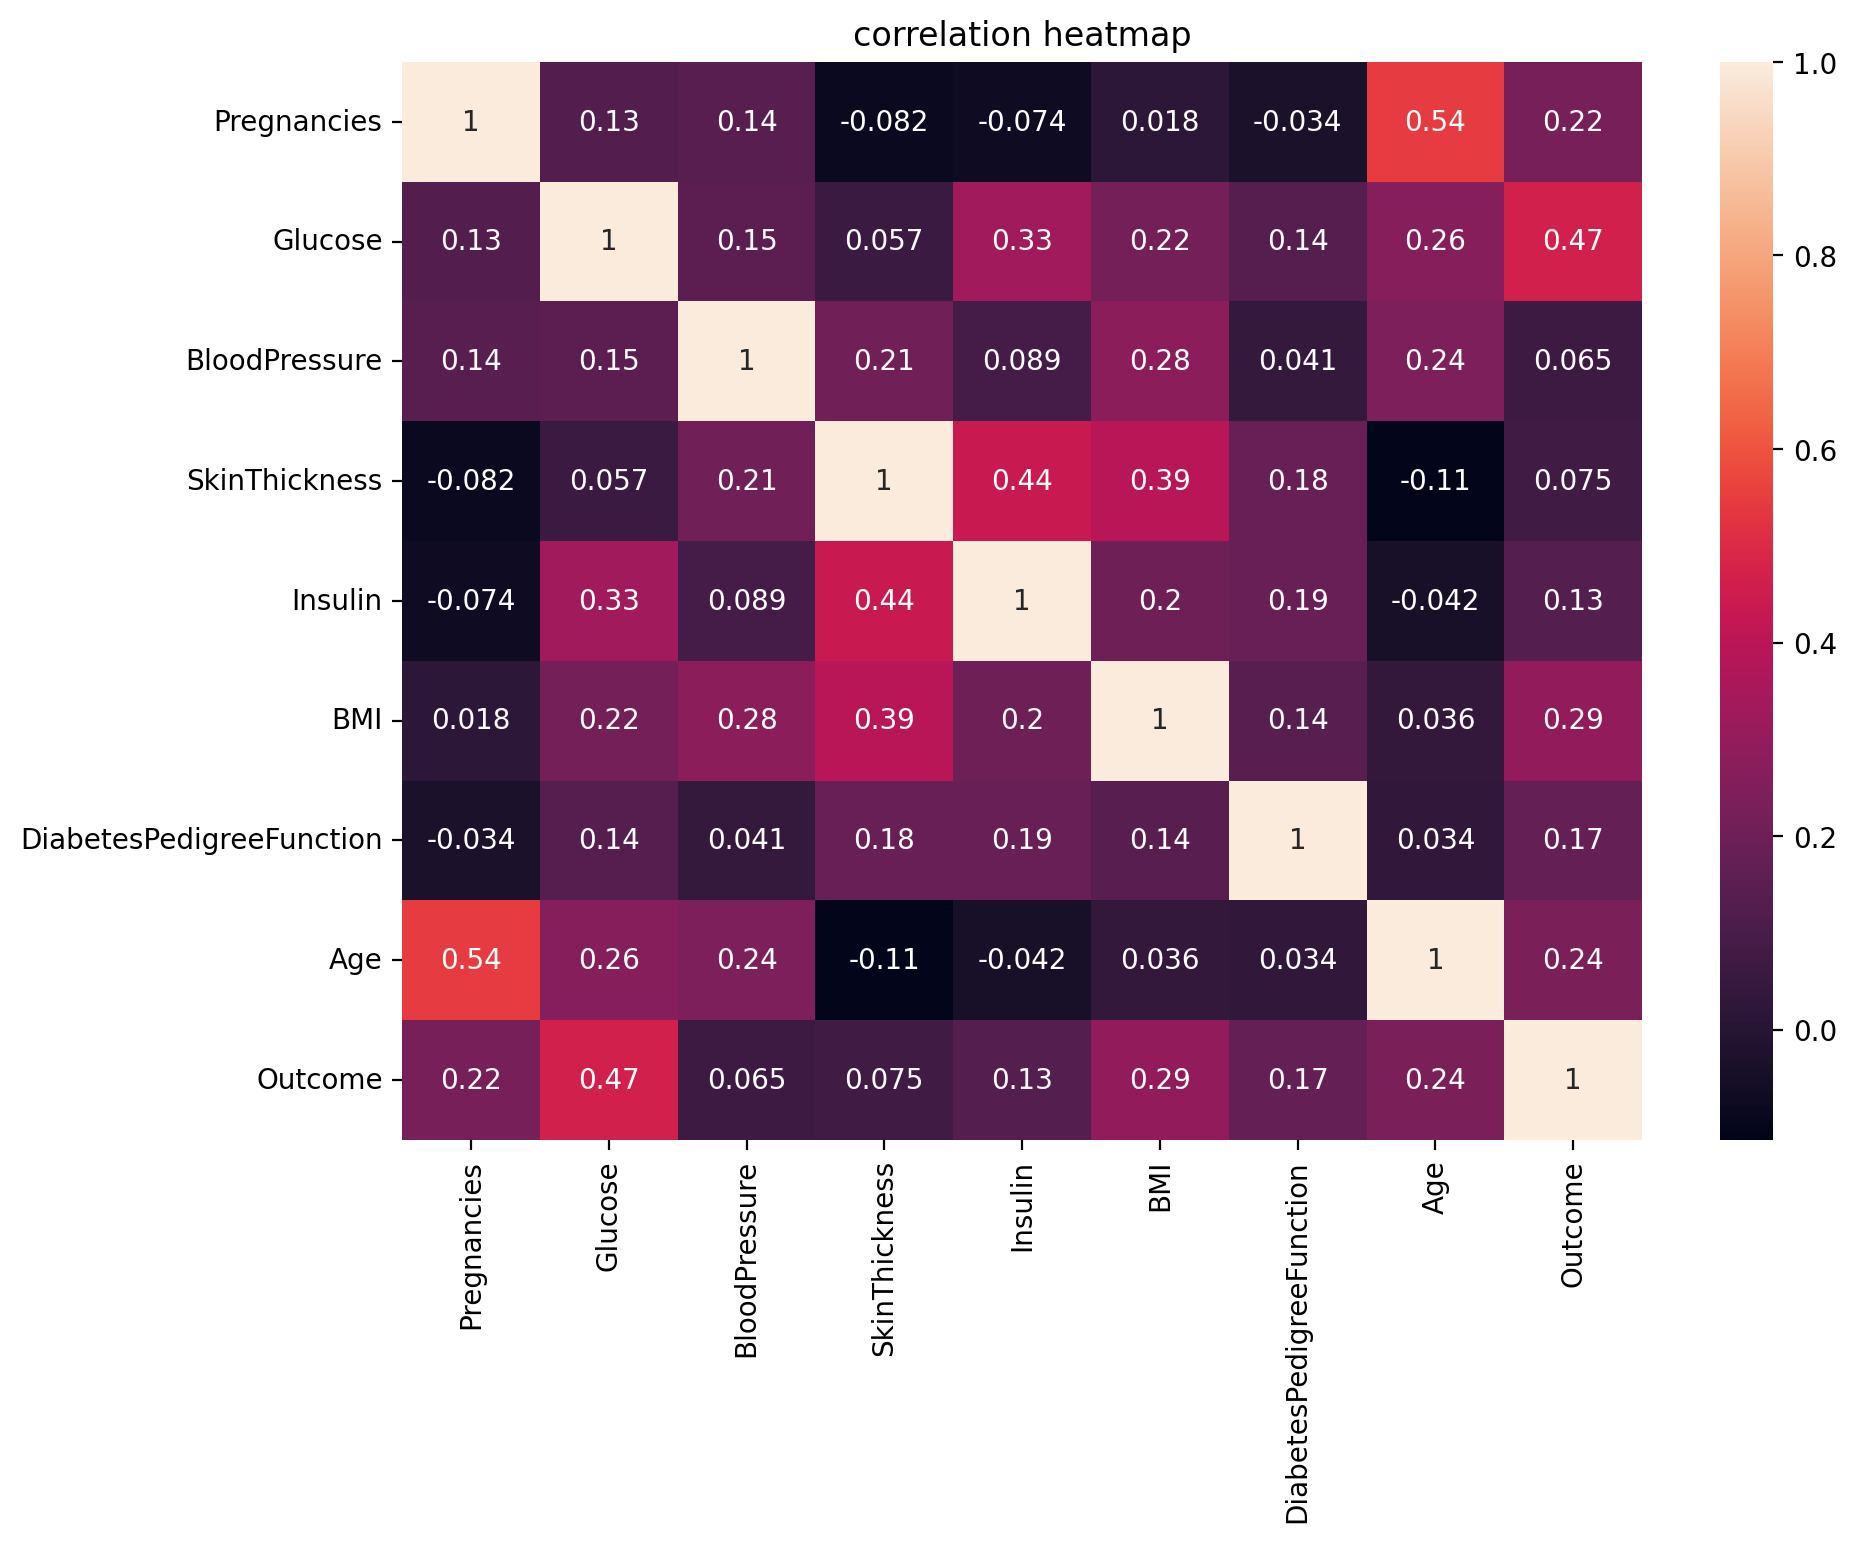

In [10]:
#df[['Pregnancies', 'Glucose',	'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',	'DiabetesPedigreeFunction',	'Age', 'Outcome']]
plt.figure(figsize=(10,7)) 
sns.heatmap(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']].corr(),annot=True) #annot는 값  표기
plt.title('correlation heatmap') #상관계수 행렬 히트맵

#### 위의 상관관계 그래프를 보면 Glucose (혈당)와 Outcome의 상관계수가 약 0.47로 가장 큼.(혈당 수치가 높을수록 당뇨병일 가능성이 높음.)
#### Pregnancies와 Age의 상관계수는 0.54로 높습니다. (나이가 많을수록 임신 횟수가 많을 가능성.)

In [11]:
df[['Pregnancies', 'Glucose',	'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',	'DiabetesPedigreeFunction',	'Age', 'Outcome']]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### **4-3 종속변수 Outcome 확인하기**
- 0 : 비당뇨 환자, 1 : 당뇨 환자
- 약 5:2의 비율을 가지고 있다

In [13]:
df['Outcome'].value_counts() # 종속변수(Survived) 확인 (0:death, 1:survival)

Outcome
0    500
1    268
Name: count, dtype: int64

In [14]:
df['Outcome'].value_counts().values

array([500, 268])

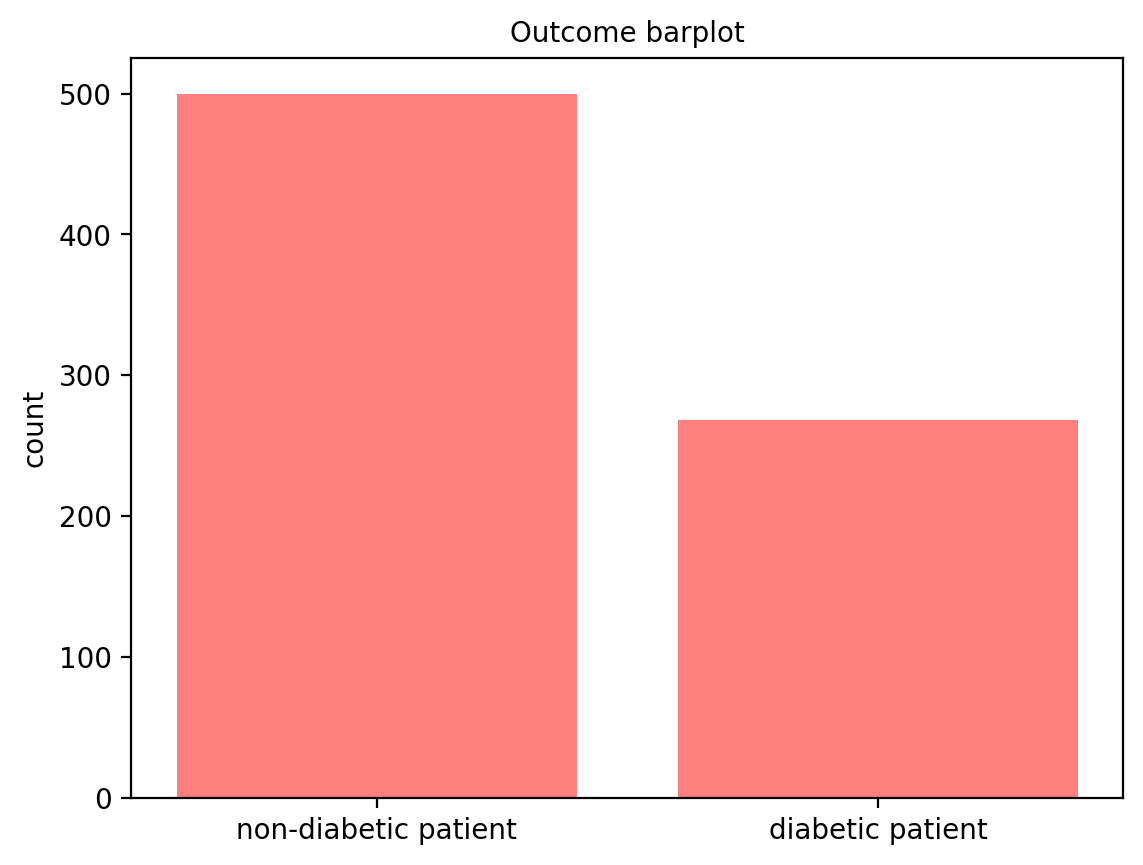

Text(0.5, 1.0, 'Outcome barplot')

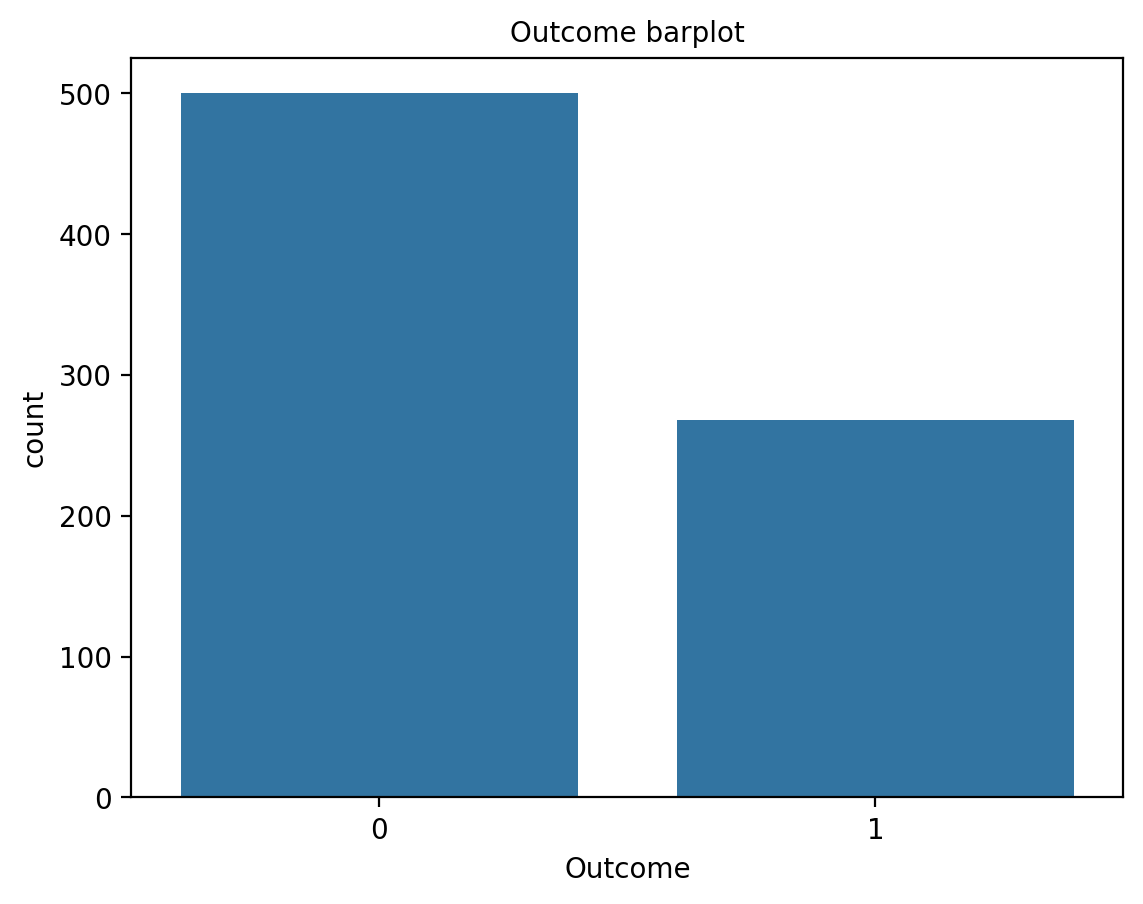

In [15]:
#plt 라이브러리
plt.bar(['non-diabetic patient','diabetic patient'],df['Outcome'].value_counts().values,color='red',alpha=0.5)
plt.title('Outcome barplot',fontsize=10)
plt.ylabel('count')
plt.show()
#sns 라이브러리
sns.countplot(x='Outcome',data=df)
plt.title('Outcome barplot',fontsize=10)

### **4-4 변수별로 데이터 확인**
#### 4-4.1 Pregnancies(임신 횟수)
 - 11회 이상(11~17회)은 극단적이지만 불가능한 수치는 아님

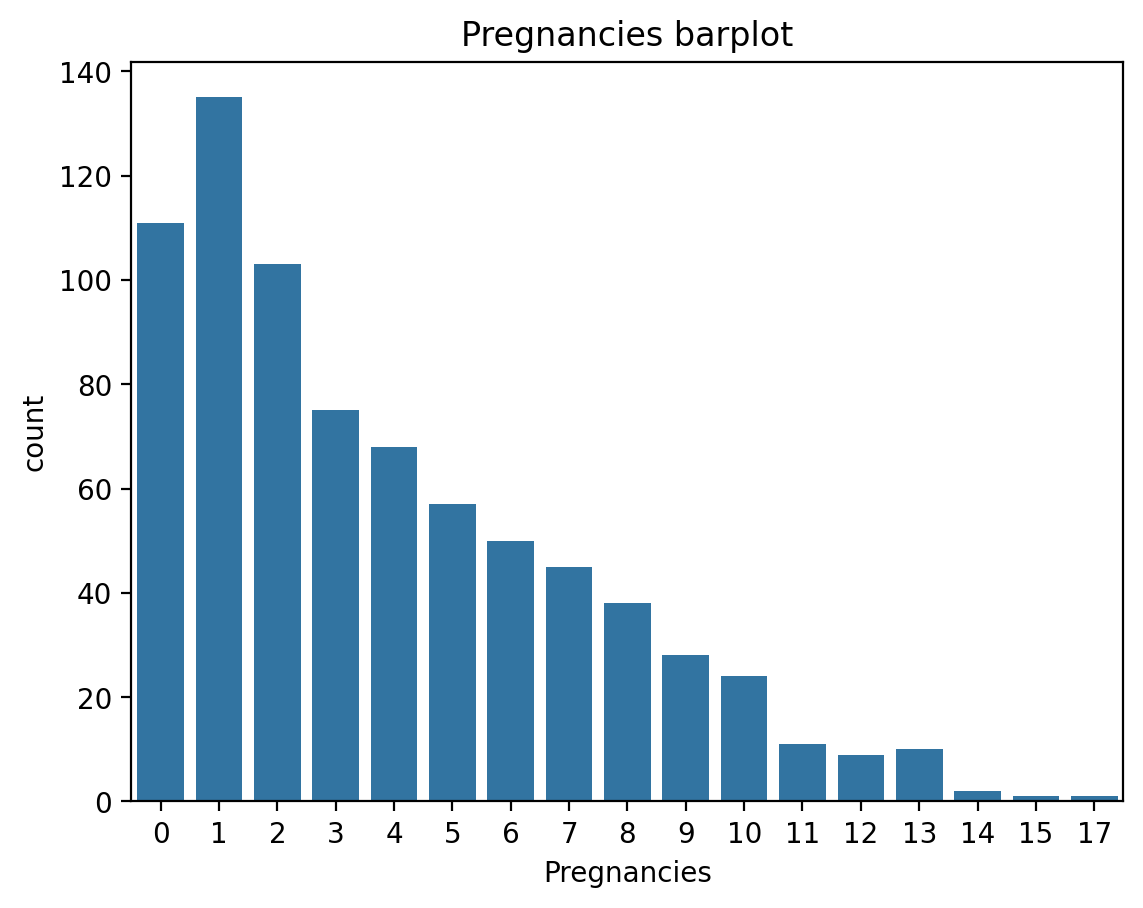

In [16]:
#Pregnancies
df['Pregnancies'].value_counts()
sns.countplot(x='Pregnancies',data=df)
plt.title('Pregnancies barplot')
plt.show()

#### 4-4.2 Glucose(혈당 수치)
- 혈당 수치가 0이면 안됨.


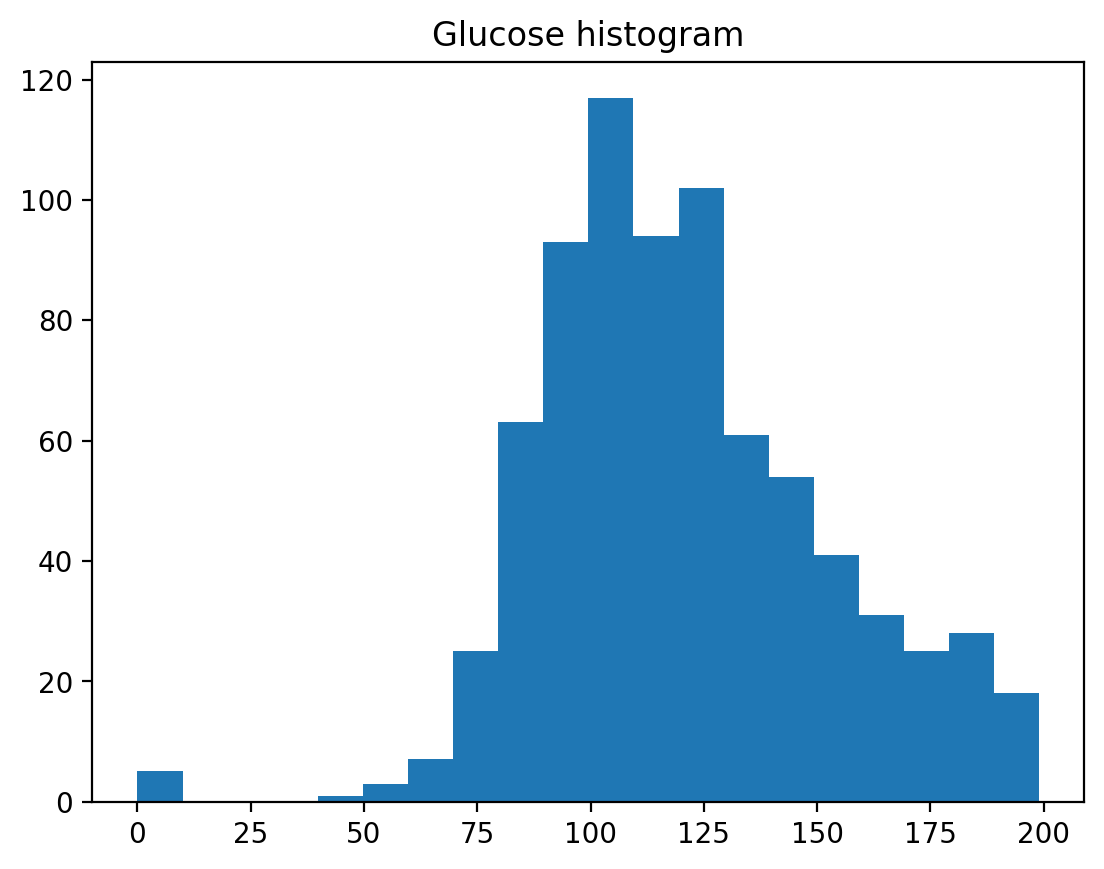

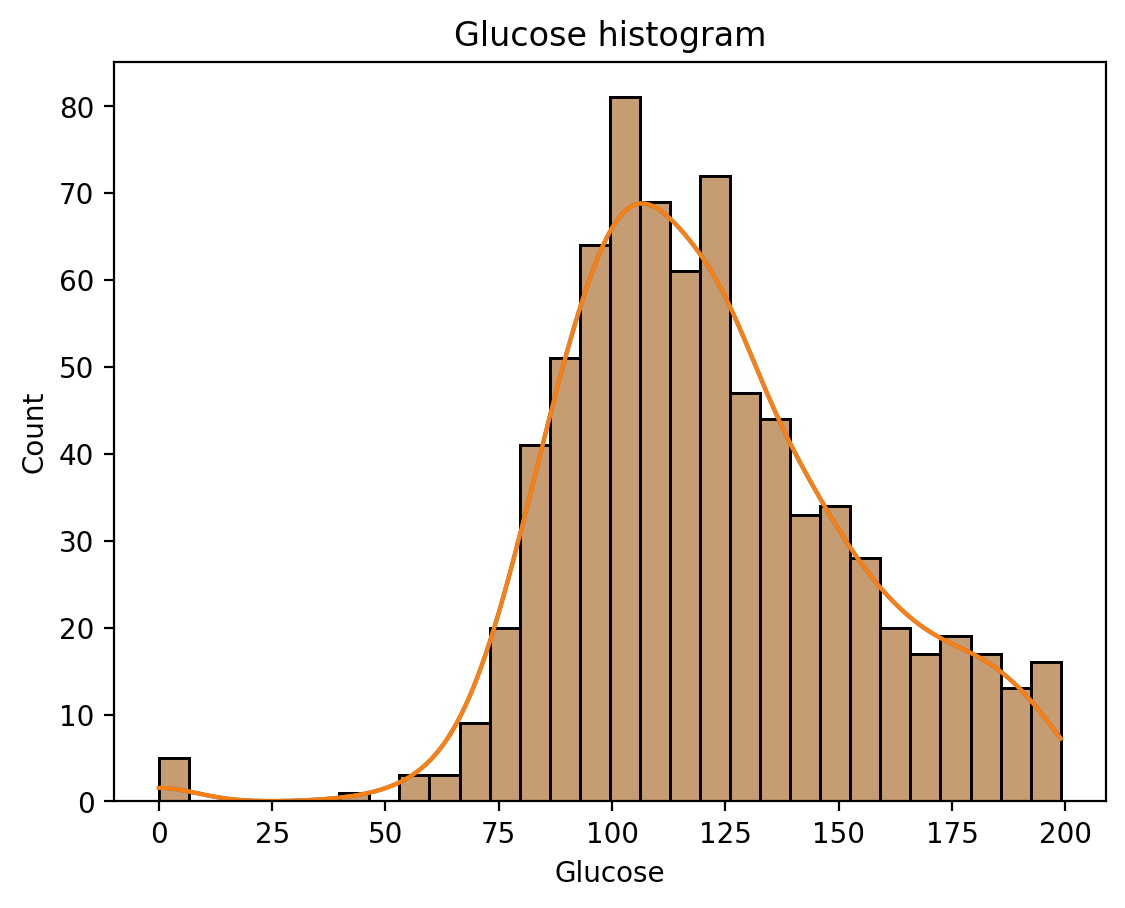

In [17]:
# Glucose 분포의 전반적 형태
plt.hist(df.Glucose,bins=20)
plt.title('Glucose histogram',fontsize=12)
plt.show()

sns.histplot(df['Glucose'], bins=30, kde=True) #sns라이브러리
sns.histplot(x='Glucose',bins=30,kde=True,data=df)
plt.title('Glucose histogram',fontsize=12)
plt.show()


#### 4-4.2.2 이상치 여부를 확인(IQR 방법 이용)

In [18]:
Q1 = df['Glucose'].quantile(0.25)
Q3 = df['Glucose'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_1 = df.copy()
df_2 = df_1[(df_1['Glucose'] >= lower_bound) & (df_1['Glucose'] <= upper_bound)]
print(df_1.shape) # (768, 9)
print(df_2.shape) # (763, 9) 5개의 이상치 제거

(768, 9)
(763, 9)


#### 4-4.3 BloodPressure(혈압)


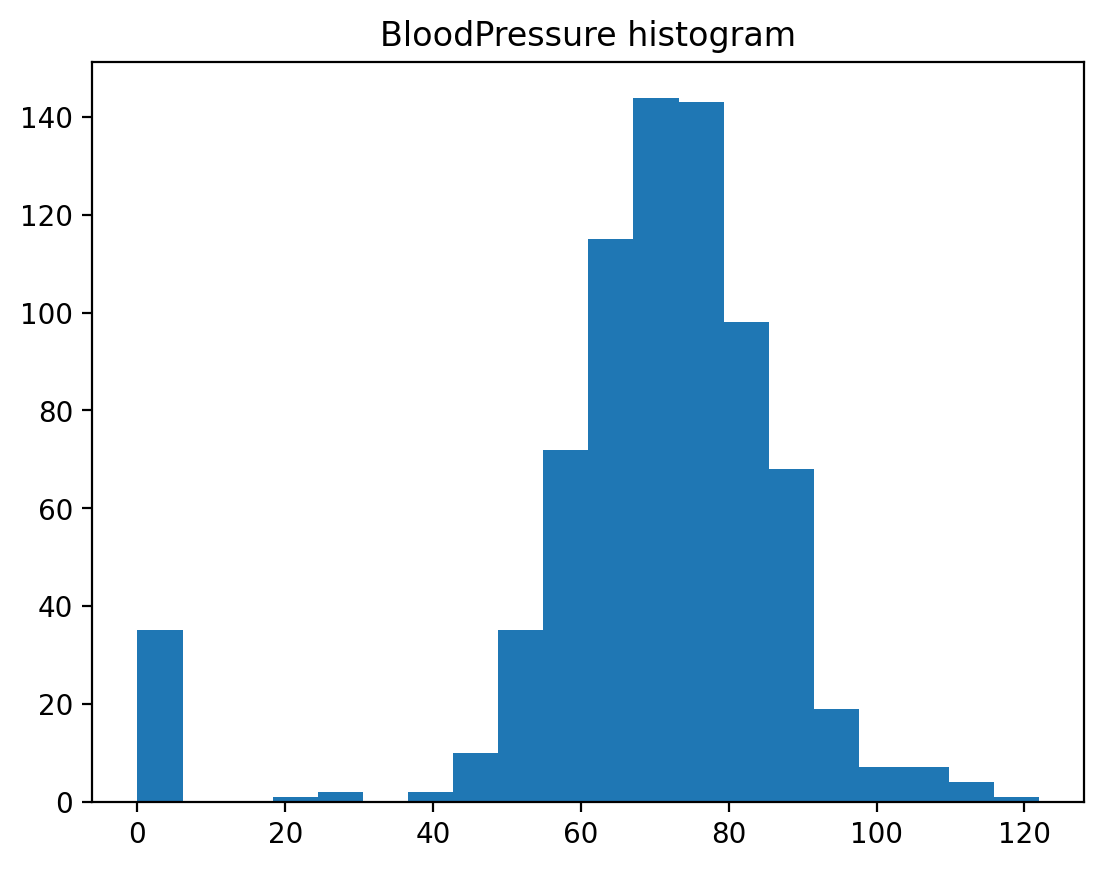

In [19]:
# BloodPressure 분포의 전반적 형태
plt.hist(df_2.BloodPressure,bins=20) # df_2로 쓰는 이유는 단계별로 이상치를 제거해 나가기 위함.
plt.title('BloodPressure histogram',fontsize=12)
plt.show()

#### 4-4.3.1 이상치 여부를 확인(IQR 방법 이용)

In [20]:
Q1 = df_2['BloodPressure'].quantile(0.25) 
Q3 = df_2['BloodPressure'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_1 = df.copy()
df_3 = df_2[(df_2['BloodPressure'] >= lower_bound) & (df_2['BloodPressure'] <= upper_bound)]
print(df_3.shape) # (718, 9)로 763-718=45개의 이상치

(718, 9)


#### 4-4.3.2 이상치 너무 많아 제거하는 것 대신, median으로 대체
- median은 이상치에 영향을 거의 받지 않아 대표값으로 쓸 때 본래 분포의 중앙 위치를 잘 유지

In [21]:
pressure_median = df_2['BloodPressure'].median() # 중앙값 계산

mask_outlier = (df_2['BloodPressure'] < lower_bound) | \
               (df_2['BloodPressure'] > upper_bound) # 각 행의 이상치여부를 표시한 불리언 배열

df_2.loc[mask_outlier, 'BloodPressure'] = pressure_median # 이상치 인 값을 중앙값으로 대체

<Axes: xlabel='BloodPressure', ylabel='count'>

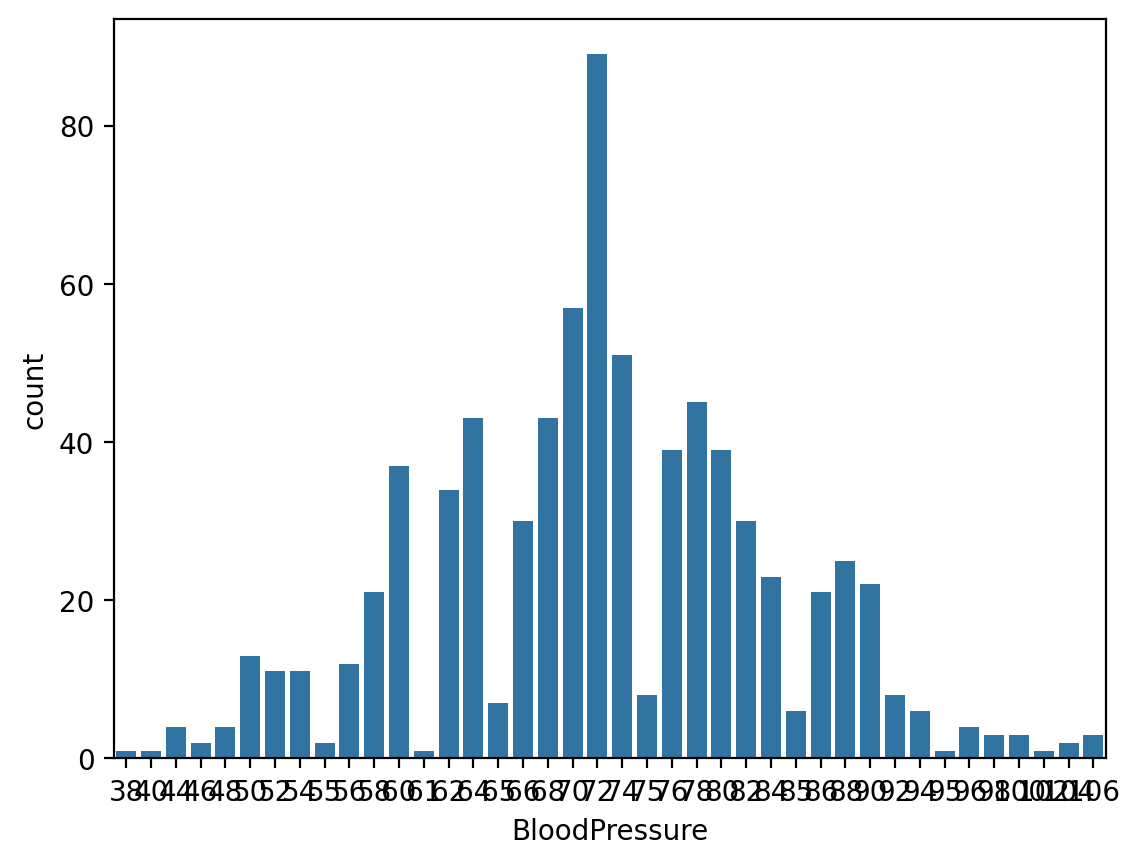

In [22]:
sns.countplot(x='BloodPressure', data=df_2) # 이상치 -> 중앙값으로 대체 되었는지 확인

#### 4-4.4 SkinThickness(피부 두께)


SkinThickness
0     227
32     30
30     27
27     23
23     22
28     20
18     20
33     20
31     19
39     18
19     18
29     17
37     16
26     16
25     16
40     16
22     16
35     14
36     14
15     14
41     14
17     14
24     12
42     11
13     11
20     11
21     10
46      8
34      8
12      7
38      7
11      6
43      6
16      6
45      6
14      6
44      5
10      5
48      4
47      4
49      3
50      3
8       2
7       2
52      2
54      2
63      1
60      1
56      1
51      1
99      1
Name: count, dtype: int64


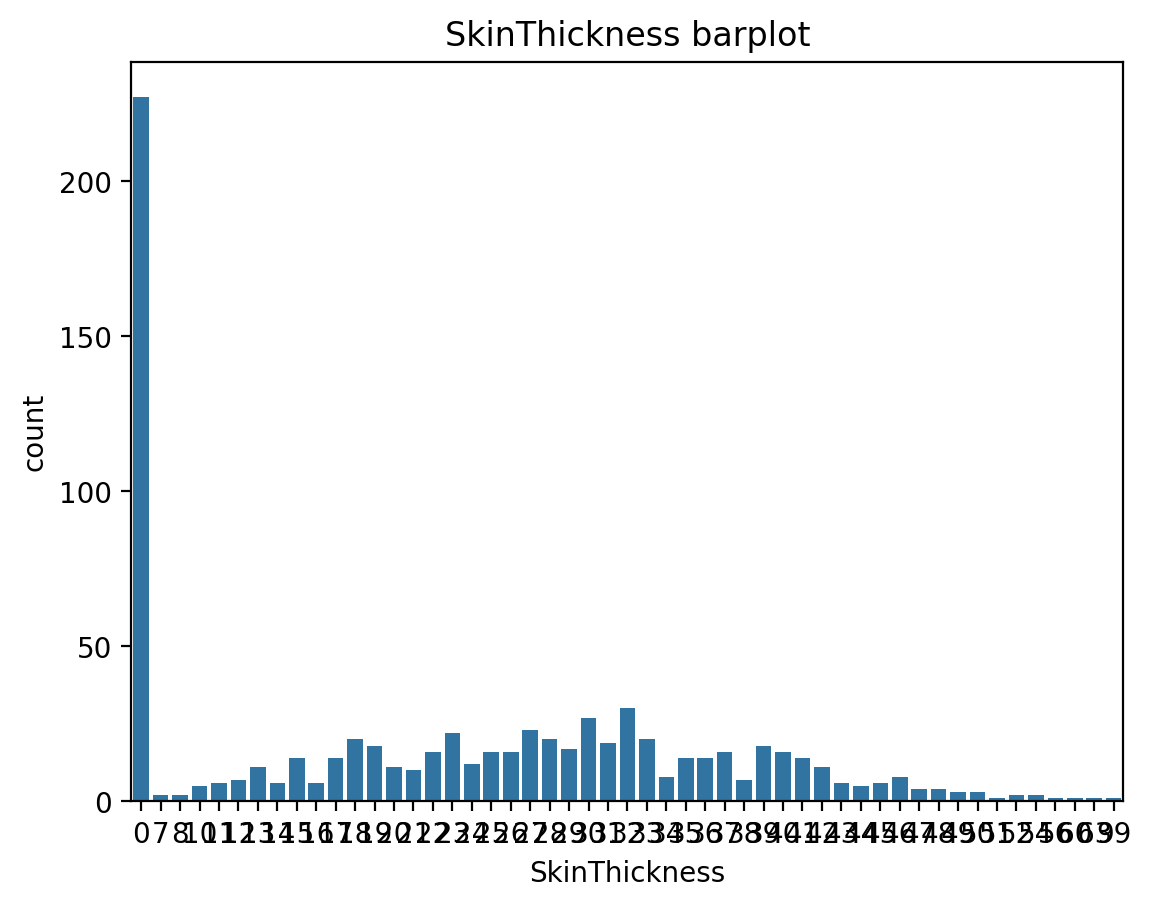

In [23]:
# SkinThickness
print(df_2['SkinThickness'].value_counts()) # 이상치(=0)이 227으로 너무 많아 제거 대신, 
sns.countplot(x='SkinThickness',data=df_2)
plt.title('SkinThickness barplot')
plt.show()

#### 4-4.4.1 이상치를 median으로 대체(이상치 너무 많아 제거 대신)
- 0을 이상치로 봄

In [24]:
skin_median = df_2['SkinThickness'].median()
df_2.loc[df_2['SkinThickness'] == 0, 'SkinThickness'] = skin_median
print(skin_median)


23.0


<Axes: xlabel='SkinThickness', ylabel='count'>

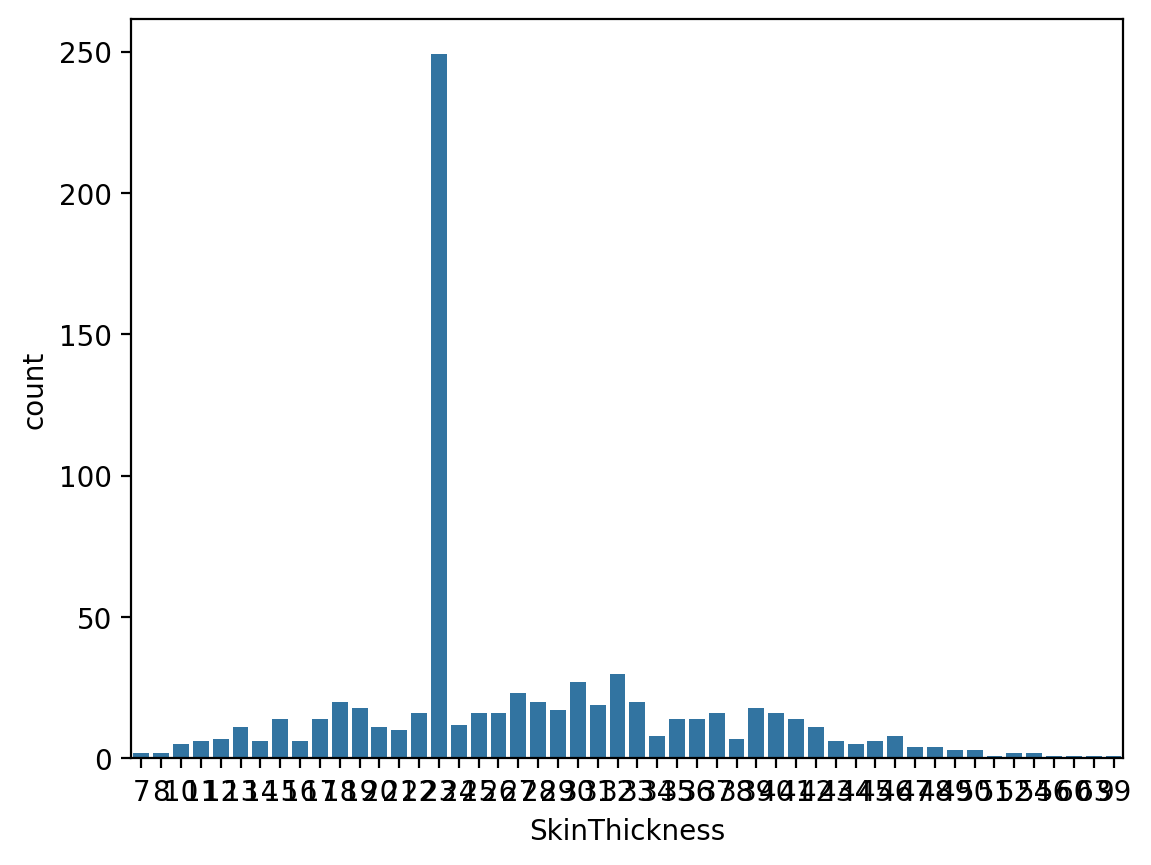

In [25]:
sns.countplot(x='SkinThickness', data=df_2) # 이상치 -> 중앙값으로 대체 되었는지 확인

#### 4-4.5 Insulin(인슐린 수치)
- 이상치(=0) 존재하지 않음.

Insulin
0      370
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: count, Length: 186, dtype: int64


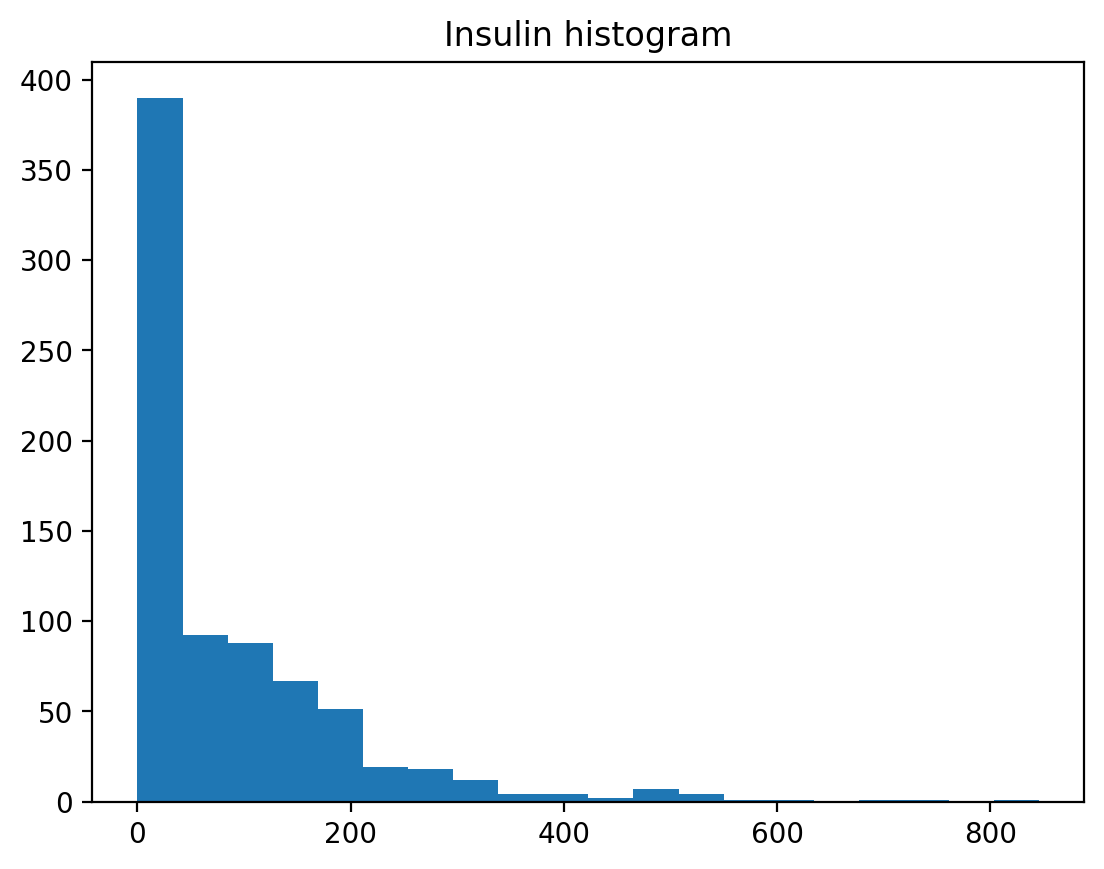

In [26]:
# Insulin
print(df_2['Insulin'].value_counts()) # 이상치 존재 X.

# Insulin 분포의 전반적 형태
plt.hist(df_2.Insulin,bins=20)
plt.title('Insulin histogram',fontsize=12)
plt.show()

#### 4-4.6 BMI(체질량 지수)


BMI
32.0    12
31.6    12
31.2    12
0.0     11
33.3    10
        ..
45.4     1
42.0     1
24.9     1
19.4     1
46.3     1
Name: count, Length: 247, dtype: int64


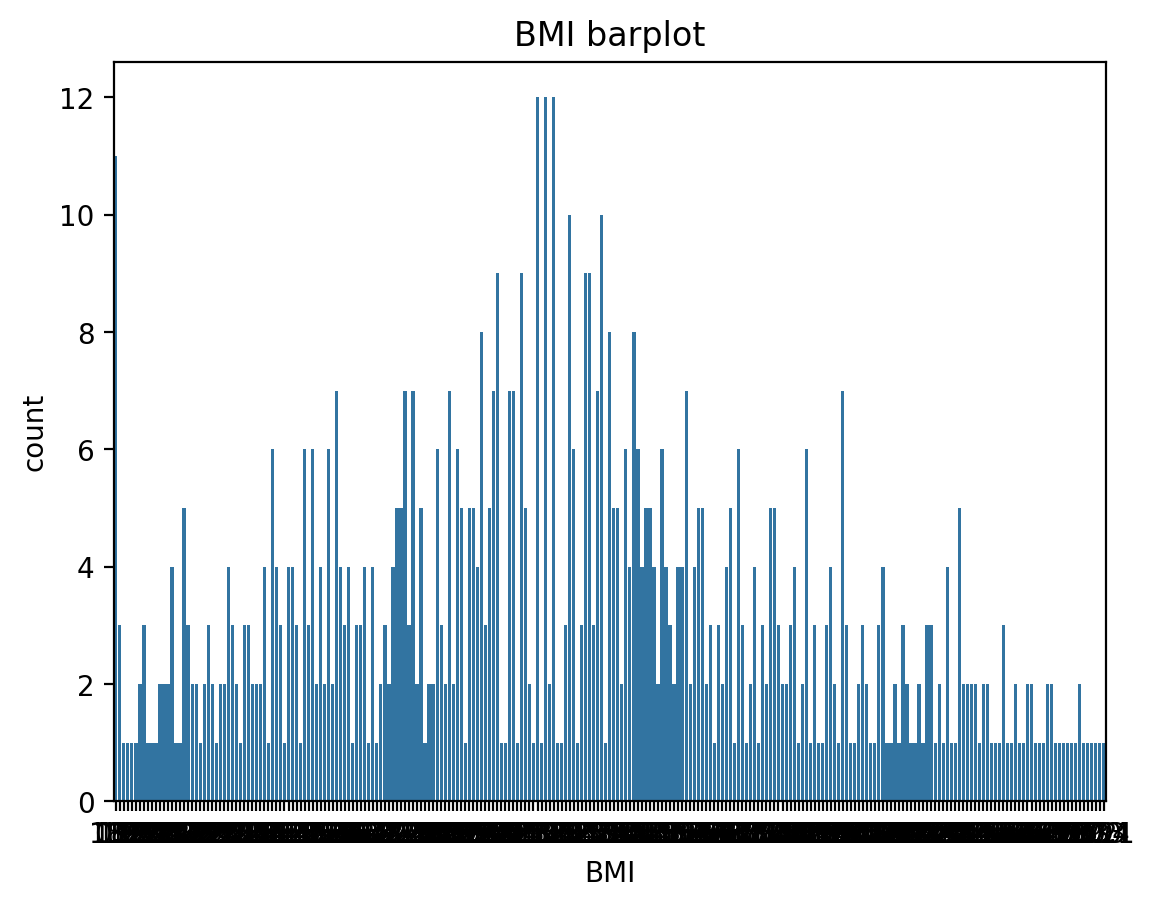

In [27]:
# BMI
print(df_2['BMI'].value_counts()) # BMI 값이 0일 수 없으므로 이상치로 간주.
sns.countplot(x='BMI',data=df_2)
plt.title('BMI barplot')
plt.show()

#### 4-4.6.1 이상치를 median으로 대체
- 0을 이상치로 봄

In [28]:
BMI_median = df_2['BMI'].median()
df_2.loc[df_2['BMI'] == 0, 'BMI'] = BMI_median
print(BMI_median)

32.0


<Axes: xlabel='BMI', ylabel='count'>

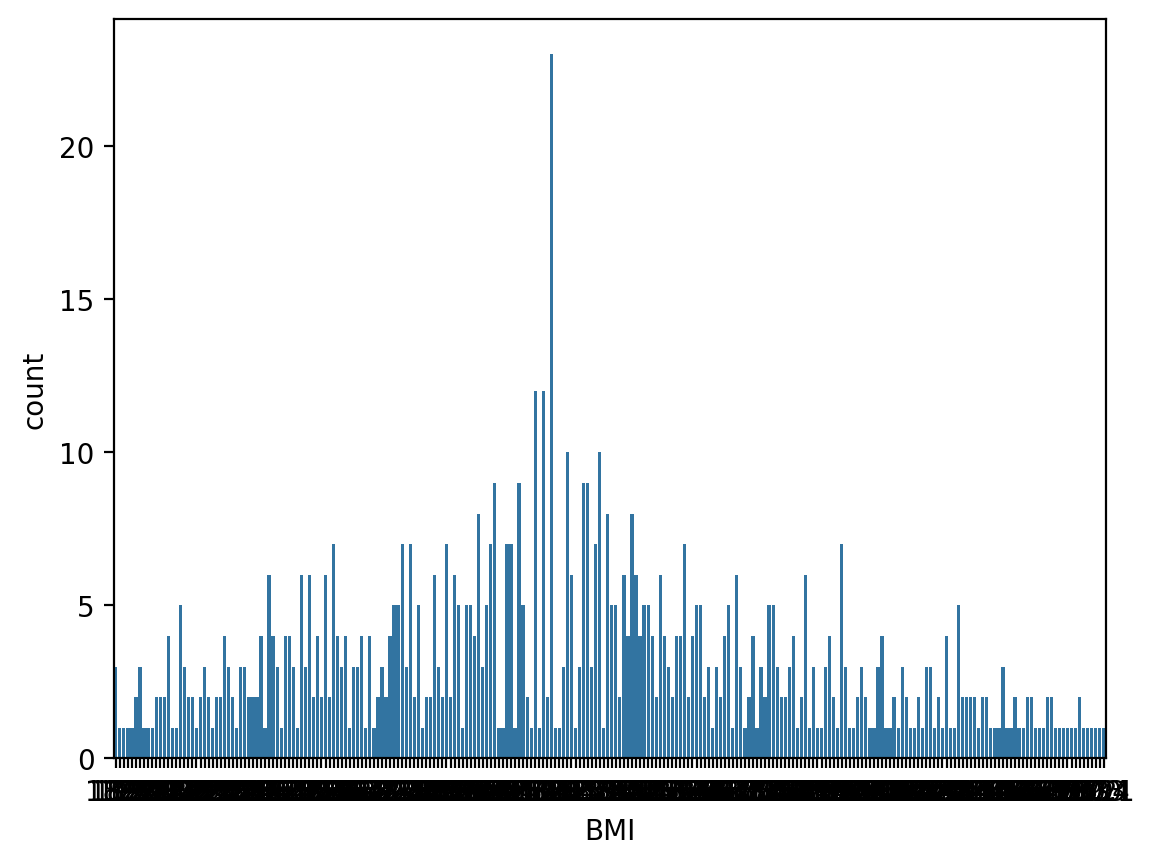

In [29]:
sns.countplot(x='BMI', data=df_2) # 이상치 -> 중앙값으로 대체 되었는지 확인

#### 4-4.7 DiabetesPedigreeFunction(당뇨 유전함수)
- 이상치 존재하지 않음.


DiabetesPedigreeFunction
0.254    6
0.258    6
0.207    5
0.259    5
0.268    5
        ..
0.655    1
0.092    1
0.926    1
0.427    1
0.171    1
Name: count, Length: 516, dtype: int64


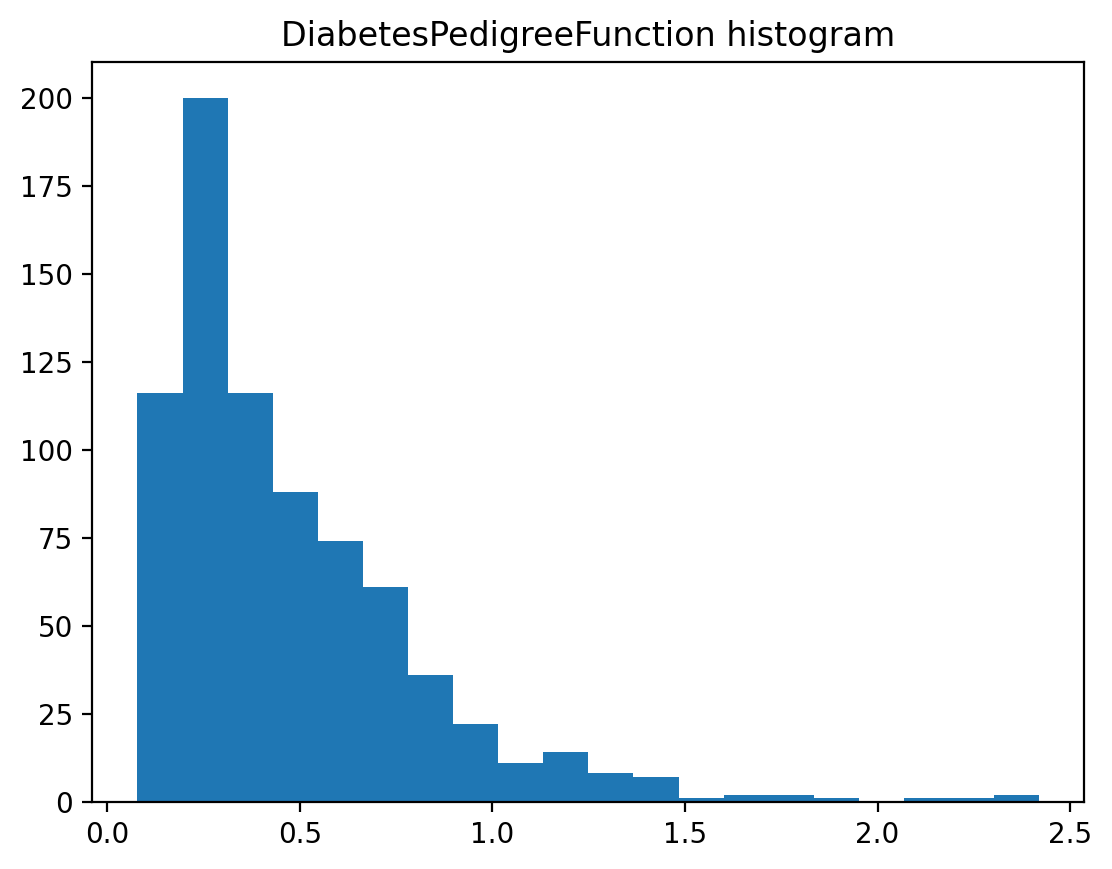

In [30]:
# DiabetesPedigreeFunction
print(df_2['DiabetesPedigreeFunction'].value_counts()) # 이상치 존재 X.

# DiabetesPedigreeFunction 분포의 전반적 형태
plt.hist(df_2.DiabetesPedigreeFunction,bins=20)
plt.title('DiabetesPedigreeFunction histogram',fontsize=12)
plt.show()

#### 4-4.8 Age

In [31]:
df['Age']

0      50
1      31
2      32
3      21
4      33
       ..
763    63
764    27
765    30
766    47
767    23
Name: Age, Length: 768, dtype: int64

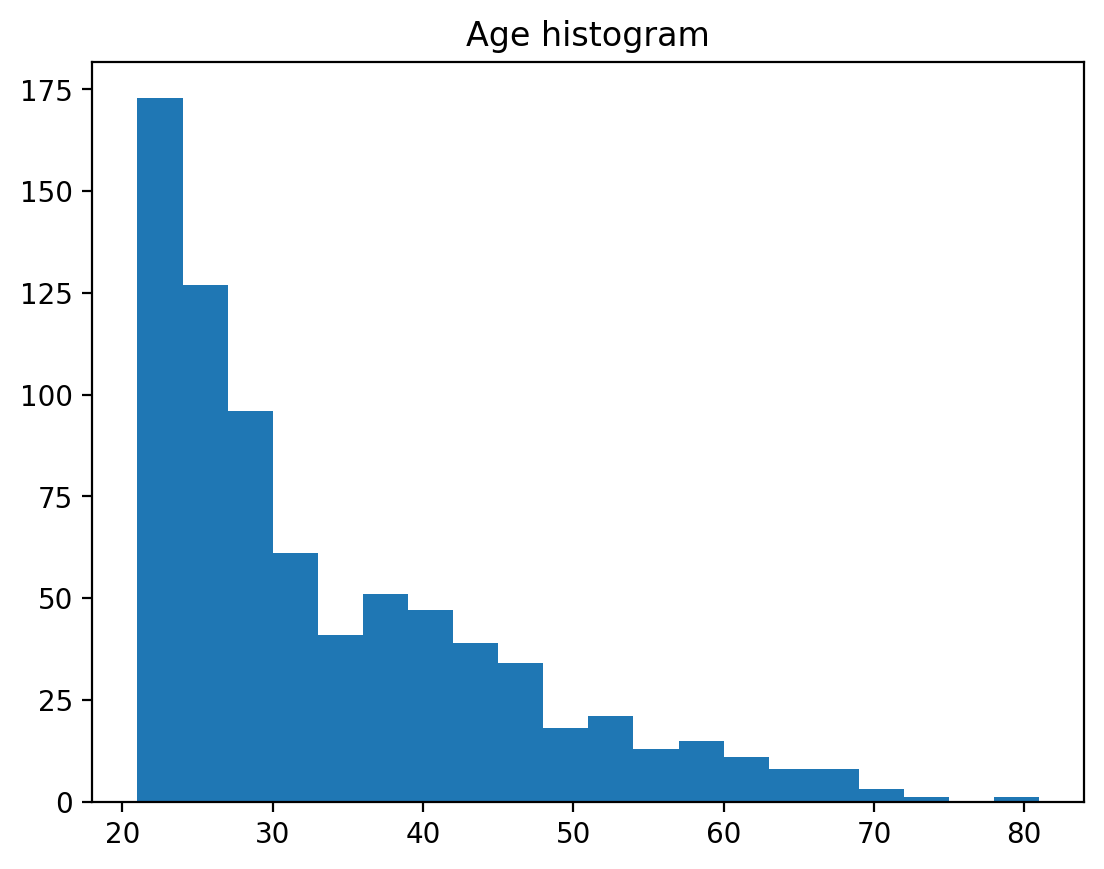

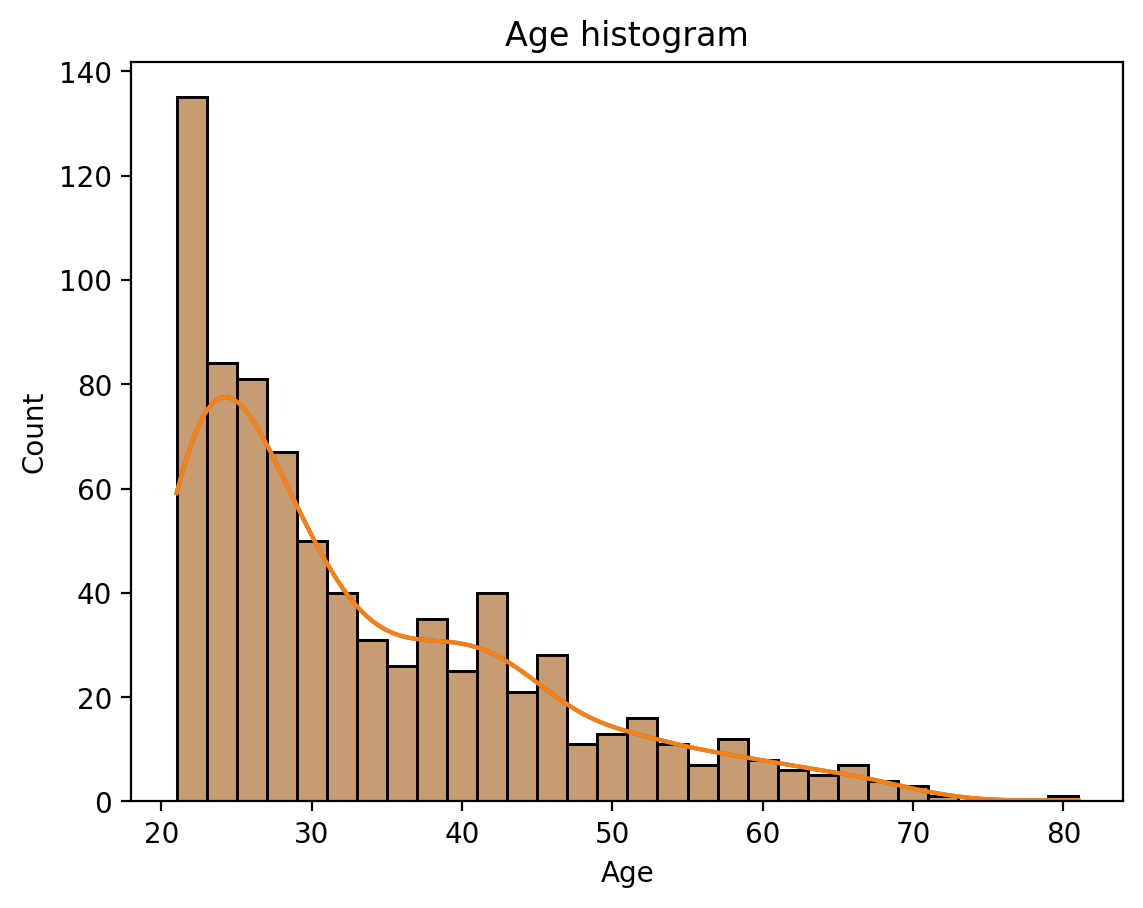

<Axes: xlabel='Outcome', ylabel='Age'>

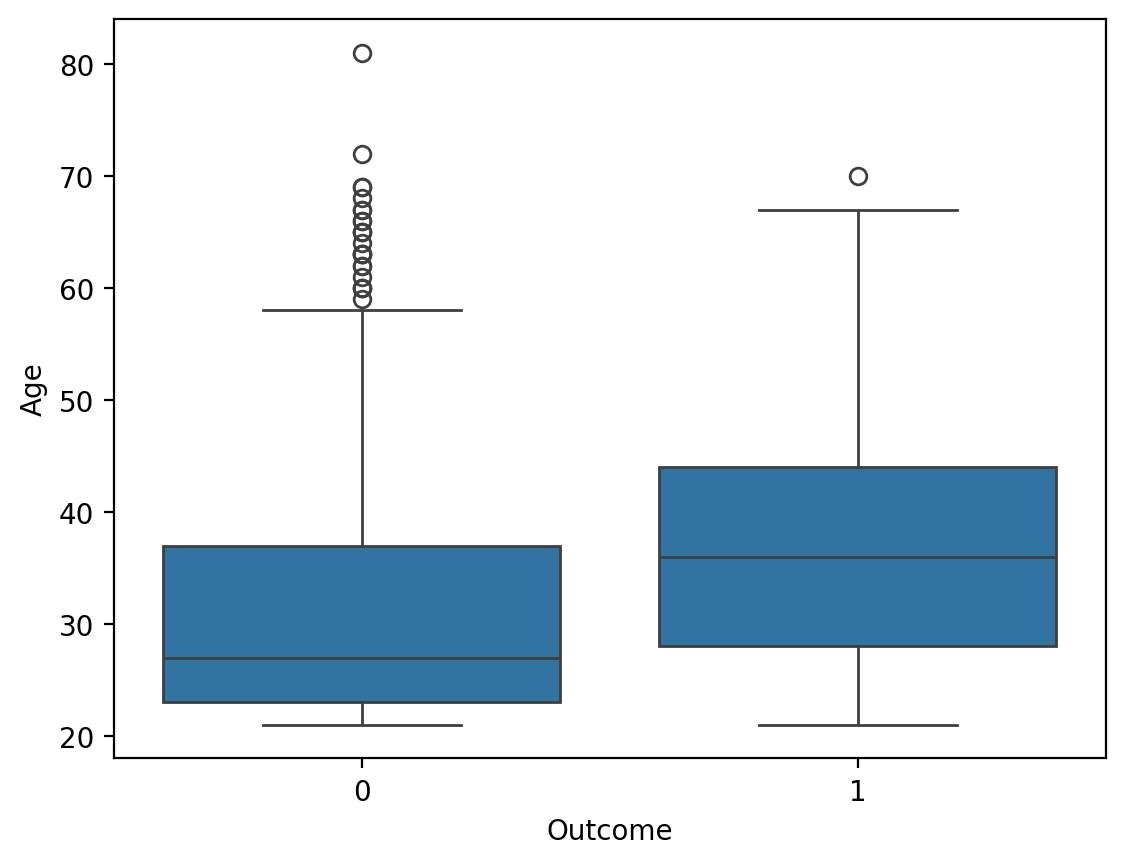

In [32]:
#Age(대부분의 환자가 20대에서 40대 사이에 몰려 있음.)
plt.hist(df.Age,bins=20)
plt.title('Age histogram',fontsize=12)
plt.show()

sns.histplot(df['Age'], bins=30, kde=True) #sns라이브러리
sns.histplot(x='Age',bins=30,kde=True,data=df)
plt.title('Age histogram',fontsize=12)
plt.show()

#나이와 당뇨 여부 관계 살펴보기(비당뇨(Outcome=0) 그룹의 중앙값은 약 27세 정도인 반면, 당뇨(Outcome=1) 그룹의 중앙값은 약 36세 정도로 훨씬 높음)
sns.boxplot(x='Outcome',y='Age',data=df)

In [35]:
df_a = df_2.copy() # df_2: 전처리된 데이터

# **5. Gradient Boosting 모델링**

### **5-1 목표변수(Y)와 설명변수(X)를 설정**

In [36]:
X = df_a.drop(columns=['Outcome'])
Y = df_a['Outcome']

### **5-2 학습 데이터(Train Set)와 검증 데이터(Test Set)분할**

In [37]:
from sklearn.model_selection import train_test_split 

train_test_split(X,Y) # X 데이터의 학습, 검증 데이터 & Y 데이터의 학습, 검증데이터 4개로 분리

[     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 545            8      186             90             35      225  34.5   
 595            0      188             82             14      185  32.0   
 473            7      136             90             23        0  29.9   
 445            0      180             78             63       14  59.4   
 211            0      147             85             54        0  42.8   
 ..           ...      ...            ...            ...      ...   ...   
 388            5      144             82             26      285  32.0   
 425            4      184             78             39      277  37.0   
 172            2       87             72             23        0  28.9   
 479            4      132             86             31        0  28.0   
 134            2       96             68             13       49  21.1   
 
      DiabetesPedigreeFunction  Age  
 545                     0.423   37  
 595                  

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1234)

### **5-3 Modeling(Gradient Boosting)**

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
model = GradientBoostingClassifier()
model.fit(X_train, Y_train) # 모델 학습

GradientBoostingClassifier()

### **5-4 성능 평가**

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
Y_train_pred = model.predict(X_train) # 학습 데이터 예측값

In [43]:
Y_test_pred = model.predict(X_test) # 비학습 데이터 예측값

In [44]:
print('학습 정확도 : ', accuracy_score(Y_train, Y_train_pred)) # 0.94
print('검증 정확도 : ', accuracy_score(Y_test, Y_test_pred)) # 0.71
# 두 지표 간 격차가 크므로 과적합

학습 정확도 :  0.9405594405594405
검증 정확도 :  0.7015706806282722


# **6. 특성공학 기법을 적용(과적합 해결)**
 <Gradient Boosting(트리 기반 앙상블) 모델에 잘 맞는 특성공학 기법>
- 1) Hyperparameter Tuning  
- 2) Cross Validation
- 3) Feature Selection
- 4) Encoding (범주형이 있다면)
- 5) Imputation
- 6) Imbalanced Sampling

-> 과적합 해결을 위해 Hyperparameter Tuning 진행. 


### **6-1 Hyperparameter Tuning(GridSearchCV)**
<파라미터>
- 1) n_estimators: 부스팅할 트리(약한 학습기)의 개수
- 2) learning_rate: 각 트리의 기여도를 조절하는 스케일 팩터
- 3) max_depth: 개별 결정트리의 최대 깊이
- 4) subsample: 트리마다 볼 샘플 비율
- 5) min_samples_split: 분할 시 최소 샘플 수
- 6) min_samples_leaf:리프 하나에 최소 샘플 수

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# 1) GBC 파이프라인 정의
model_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    GradientBoostingClassifier(random_state=42)
)

# 2) 튜닝할 파라미터 범위 (pipeline 스텝 이름__파라미터)
param_dist = {
    'gradientboostingclassifier__n_estimators': randint(50, 500),
    'gradientboostingclassifier__learning_rate': uniform(0.01, 0.2),
    'gradientboostingclassifier__max_depth': randint(2, 6),
    'gradientboostingclassifier__subsample': uniform(0.6, 0.4),
    'gradientboostingclassifier__min_samples_split': randint(2, 20),
    'gradientboostingclassifier__min_samples_leaf': randint(1, 10),
}

# 3) RandomizedSearchCV 설정
rand_search = RandomizedSearchCV(
    estimator=model_pipe,
    param_distributions=param_dist,
    n_iter=30,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# 4) 학습 & 최적 파라미터 확인
rand_search.fit(X_train, Y_train)
print("Best Params :", rand_search.best_params_)
print("Best CV AUC:", rand_search.best_score_) # 0.85
print("Test    AUC:", rand_search.score(X_test, Y_test)) # 0.79 -> 과적합 어느정도 해결

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Params : {'gradientboostingclassifier__learning_rate': np.float64(0.10335257864959599), 'gradientboostingclassifier__max_depth': 2, 'gradientboostingclassifier__min_samples_leaf': 3, 'gradientboostingclassifier__min_samples_split': 8, 'gradientboostingclassifier__n_estimators': 70, 'gradientboostingclassifier__subsample': np.float64(0.7801997007878172)}
Best CV AUC: 0.8516519875938158
Test    AUC: 0.7925470164847922


### **6-2 Hyperparameter Tuning 후 best_model 성능 평가**



In [46]:
from sklearn.metrics import classification_report

# 1. 
best_model = rand_search.best_estimator_

# 2. 테스트 세트 예측
Y_train_pred = best_model.predict(X_train) # 학습 데이터의 예측값 계산
Y_test_pred = best_model.predict(X_test) # 검증데이터의 예측값 계산


In [ ]:
# 학습 성능 출력
print(classification_report(Y_train, Y_train_pred))

# 비학습 성능 출력
print(classification_report(Y_test, Y_test_pred)) # 약간의 과적합 남아있음

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       379
           1       0.84      0.69      0.76       193

    accuracy                           0.85       572
   macro avg       0.85      0.81      0.83       572
weighted avg       0.85      0.85      0.85       572

              precision    recall  f1-score   support

           0       0.73      0.86      0.79       118
           1       0.69      0.48      0.56        73

    accuracy                           0.72       191
   macro avg       0.71      0.67      0.68       191
weighted avg       0.71      0.72      0.70       191



# **7. 생성한 모델을 파일형태로 저장**

In [48]:
import pickle

In [ ]:
pickle.dump(best_model, open('model.sav', 'wb')) # 저장